In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import tree
from sklearn.svm import SVC

data = pd.read_csv('creditcard.csv')

print 'done'

done


In [2]:
# converting data from pandas to numpy array

array = np.array(data)

x = array[:,0:30]
y = array[:,30]
print x.shape
print y.shape


(284807, 30)
(284807,)


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(confusion_mat):
    sb.heatmap(confusion_mat, annot=True, fmt='g')
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion matrix')
    plt.show()
    
def plot_roc_visualisation(y_test, pred):
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label="auc: "+str(auc(fpr, tpr)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('roc curve')
    plt.legend(loc=4)
    plt.show()
    print 'auc: '+str(auc(fpr, tpr))
    
    
def evaluation_metric(y_test, pred):
    
    accuracy = accuracy_score(y_test, pred)
    print 'Accuracy: '+str(accuracy)
    
    print 'Recall: '+str(recall_score(y_test, pred))
    print 'Precision: '+str(precision_score(y_test, pred))
    print 'f1_score: '+str(f1_score(y_test, pred))

    print 'classificatoin report'
    print classification_report(y_test, pred)
    
    # confusion matrix visualisation
    from sklearn.metrics import confusion_matrix
    confusion_mat = confusion_matrix(pred, y_test)
    print confusion_mat
    plot_confusion_matrix(confusion_mat)

    # roc and auc visualisation
    plot_roc_visualisation(y_test, pred)
    
    

# SVM directly applying on data

In [4]:

from sklearn.model_selection import train_test_split


clf = SVC(kernel='linear')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

clf.fit(x_train, y_train)
pred = clf.predict(x_test)



Accuracy: 0.9986657771847899
Recall: 0.36633663366336633
Precision: 0.7551020408163265
f1_score: 0.49333333333333323
classificatoin report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     56861
        1.0       0.76      0.37      0.49       101

avg / total       1.00      1.00      1.00     56962

[[56849    64]
 [   12    37]]


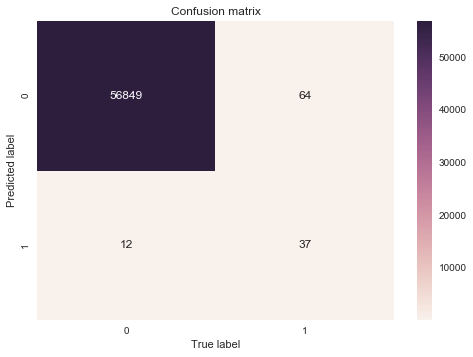

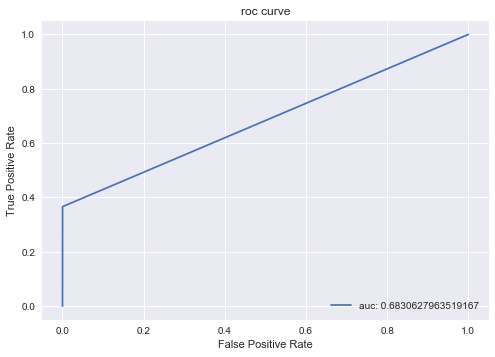

auc: 0.6830627963519167


In [5]:
evaluation_metric(y_test, pred)

# doing standard scaler

In [6]:
# standarisation of all feature values
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)


# SVM with standard scaler

In [9]:

from sklearn.model_selection import train_test_split


from sklearn import svm
clf = svm.SVC(gamma='scale')


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

clf.fit(x_train, y_train)
pred = clf.predict(x_test)



Accuracy: 0.9991573329588147
Recall: 0.801980198019802
Precision: 0.7431192660550459
f1_score: 0.7714285714285715
classificatoin report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     56861
        1.0       0.74      0.80      0.77       101

avg / total       1.00      1.00      1.00     56962

[[56833    20]
 [   28    81]]


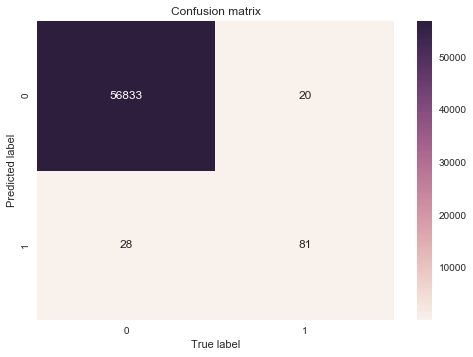

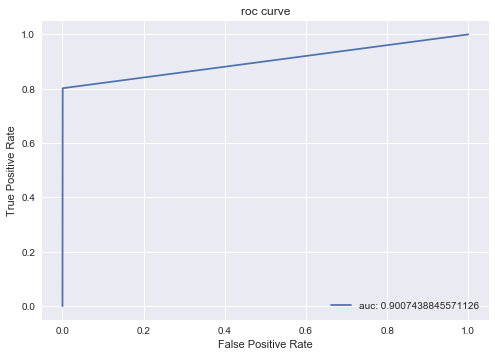

auc: 0.9007438845571126


In [8]:
evaluation_metric(y_test, pred)

# SVM with SMOTE

In [11]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=0)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print 'Before applying SMOTE on training set'
print 'Number of fraudelent transaction:  '+str((y_train==1).sum())
print 'Number of genuine transaction   :  '+str((y_train==0).sum())

print '\nAfter applying SMOTE'
x_train_smote, y_train_smote = smote.fit_sample(x_train, y_train)
print 'Number of fraudelent transaction: '+str((y_train_smote==1).sum())
print 'Number of genuine transaction   : '+str((y_train_smote==0).sum())


clf = SVC(kernel='linear')


clf.fit(x_train_smote, y_train_smote)
pred = clf.predict(x_test)

Before applying SMOTE on training set
Number of fraudelent transaction:  391
Number of genuine transaction   :  227454

After applying SMOTE
Number of fraudelent transaction: 391
Number of genuine transaction   : 391


Accuracy: 0.8953337312594362
Recall: 0.9306930693069307
Precision: 0.01553975863779137
f1_score: 0.030569105691056912
classificatoin report
             precision    recall  f1-score   support

        0.0       1.00      0.90      0.94     56861
        1.0       0.02      0.93      0.03       101

avg / total       1.00      0.90      0.94     56962

[[50906     7]
 [ 5955    94]]


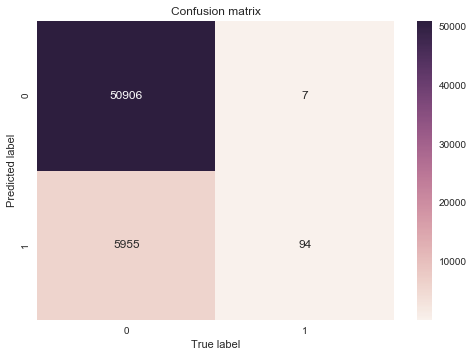

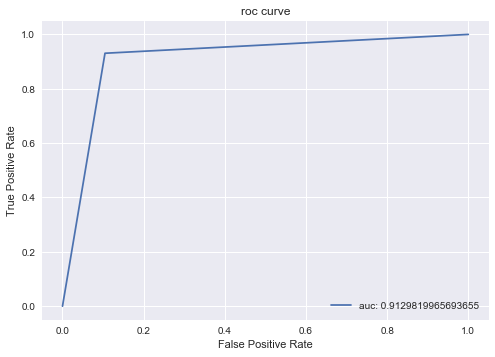

auc: 0.9129819965693655


In [12]:
evaluation_metric(y_test, pred)